In [8]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        #self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.phi = [0.4816176,0.5183824]
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        #self.mu = [  X[row_index,:] for row_index in random_row ]
        #self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

        self.mu = [np.array([3.454679,70.473282]),np.array([3.518539,71.290780])]
        self.sigma = [np.array([[1.296921,13.913385],[13.91339,183.97697]])]*2

        print ("Initialization phi:{}".format(self.phi))
        print ("Initialization mu:{}".format(self.mu))
        print ("Initialization sigma:{}".format(self.sigma))

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
    
    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T, 
                aweights=(weight/total_weight).flatten(), 
                bias=True)

    def fit(self, X):
        self.initialize(X)
        
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            
    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i], 
                cov=self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

In [18]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
#iris = load_iris()
#X = iris.data
X = np.loadtxt('data/Faithful.txt')

In [51]:
np.random.seed(42)
gmm = GMM(k=2, max_iter=20)
gmm.fit(X)

Initialization phi:[0.4816176, 0.5183824]
Initialization mu:[array([ 3.454679, 70.473282]), array([ 3.518539, 71.29078 ])]
Initialization sigma:[array([[  1.296921,  13.913385],
       [ 13.91339 , 183.97697 ]]), array([[  1.296921,  13.913385],
       [ 13.91339 , 183.97697 ]])]


In [52]:
gmm.phi

array([0.49541216, 0.50458784])

In [53]:
gmm.mu

[array([ 2.90469003, 63.87839293]), array([ 4.06027288, 77.78809366])]

In [22]:
gmm.sigma

[array([[  1.28277093,  14.25520482],
        [ 14.25520482, 189.04623531]]),
 array([[ 0.65127163,  5.64044995],
        [ 5.64044995, 83.47831039]])]

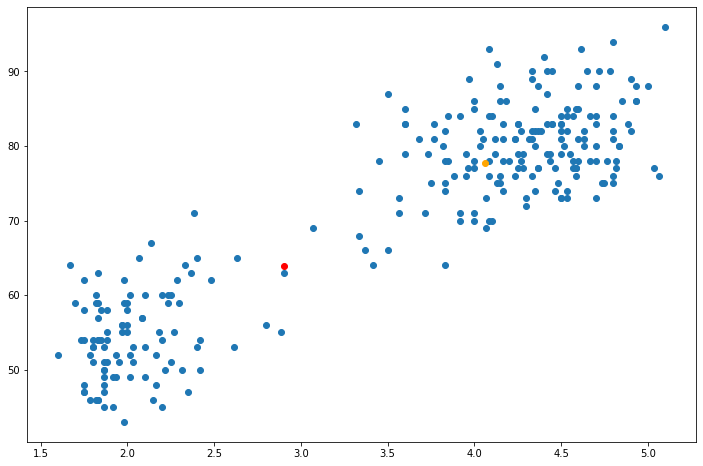

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(2.90469003, 63.87839293, color = "red")
plt.scatter(4.06027288, 77.78809366,color="orange")

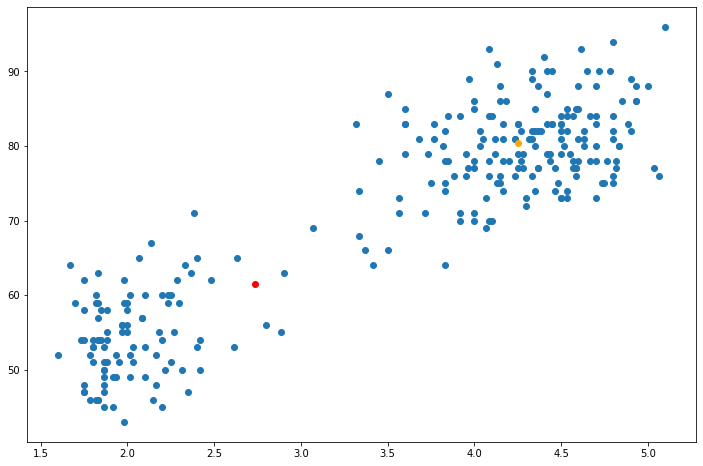

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(2.73476657, 61.55115711, color = "red")
plt.scatter(4.25146916, 80.37538348,color="orange")

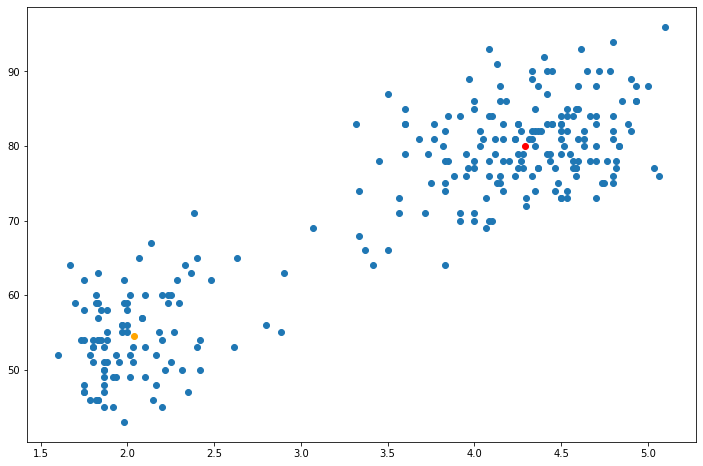

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(4.28977944, 79.96953298, color = "red")
plt.scatter(2.03652149, 54.47986018,color="orange")

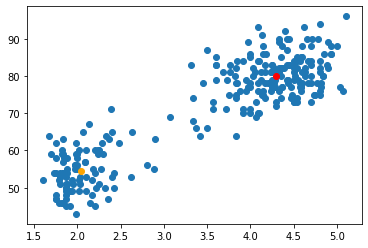

In [54]:
#plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(4.28966197, 79.96811518, color = "red")
plt.scatter(2.03638845, 54.47851638,color="orange")